<a href="https://colab.research.google.com/github/akhil1198/RL-PA1/blob/main/RL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 9.6 MB/s eta 0:00:00


In [144]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

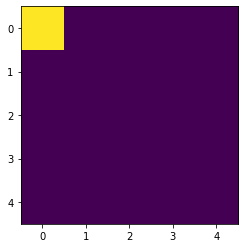

<IPython.core.display.Javascript object>

In [145]:
output_grid = widgets.Grid(1,1)

for _ in range(5):
  grid = np.zeros((5, 5))
  grid[np.random.randint(5), np.random.randint(5)] = 1

  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(2) 

In [150]:
class GridEnv(gym.Env):
  def __init__(self, env_type="deterministic"):
    """This method initializes the environment.

        :param str environment_type: - It can take two values: 1. 'deterministic' 2. 'stochastic'
                                       indicating the type of environment."""
    self.environment_width = 5
    self.environment_height = 5
    self.observation_space = spaces.Discrete(25)
    self.action_space = spaces.Discrete(4)

    self.timestep = 0
    self.max_timesteps = 10

    self.agent_pos = [0, 0]
    self.goal_pos = [4, 4]

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5

    # self.agent_pos = np.asarray([0, 0])
    # self.goal_pos = np.asarray([4, 4])

    self.reward_pos = np.asarray([[0, 4], [2, 1], [3, 4], [4, 2]])
    self.negreward_pos = np.asarray([[1, 2], [3, 0], [3, 3]])

  def reset(self):
    """This method resets the agent position and returns the state as the observation.

        :returns int observation: -  Integer representing the grid block the agent is in.
                 dict info: - A dictionary that can be used to provide additional implementation information."""
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    info = {}

    return observation, info
  
  def step(self, action, obs):
    """This method implements what happens when the agent takes a particular action. It changes the agent's
        position (While not allowing it to go out of the environment space.), maps the environment co-ordinates to a
        state, defines the rewards for the various states, and determines when the episode ends.

        :param int action: - Integer in the range 0 to 3 inclusive representing the different actions the agent can
        take.

        :returns arr observation: - Array representing the partial observation.
                 int reward: - Integer value that's used to measure the performance of the agent.
                 bool terminated: - Boolean describing whether the episode has ended.
                 bool truncated: Boolean describing whether a truncation condition outside the scope of the MDP is
                                 satisfied.
                 dict info: - A dictionary that can be used to provide additional implementation information."""
    print("check here -> ", action, self.agent_pos[0], self.agent_pos[1])
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1

    # Comment this to demonstrate the truncation condition.
    self.agent_pos = np.clip(self.agent_pos, 0, 2)

    print("agent pos ->", self.agent_pos)
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    print("Rewards -> ", self.reward_pos[0])

    reward = 0
    #[0, 4], [2, 1], [3, 4], [4, 2]
    if np.array_equal(self.agent_pos, self.reward_pos[0]):
      reward += 2
    if np.array_equal(self.agent_pos, self.reward_pos[1]):
      reward += 4
    if np.array_equal(self.agent_pos, self.reward_pos[2]):
      reward += 8
    if np.array_equal(self.agent_pos, self.reward_pos[3]):
      reward += 6
    
    if np.array_equal(self.agent_pos, self.goal_pos):
      reward += 100
    
    #[1, 2], [3, 0], [3, 3]
    if np.array_equal(self.agent_pos, self.negreward_pos[0]):
      reward -= 5
    if np.array_equal(self.agent_pos, self.negreward_pos[1]):
      reward -= 6
    if np.array_equal(self.agent_pos, self.negreward_pos[2]):
      reward -= 2 

    self.timestep += 1


    terminated = True if self.timestep >= self.max_timesteps else False
    truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False

    info = {}
    
    return observation, reward, terminated, truncated, info

  def render(self):
    plt.imshow(self.state)


In [151]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    print("asdf", self.observation_space)
  def step(self, obs):
    return np.random.choice(self.action_space.n)
  

In [152]:
env = GridEnv()
agent = RandomAgent(env)

asdf Discrete(25)


asdf Discrete(25)


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

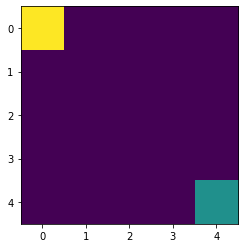

<IPython.core.display.Javascript object>

ACTION ->  2
check here ->  2 0 0
agent pos -> [0 1]
Rewards ->  [0 4]
action ->  2
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

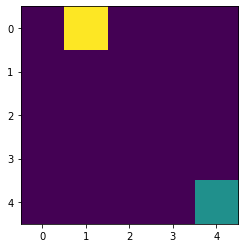

<IPython.core.display.Javascript object>

ACTION ->  0
check here ->  0 0 1
agent pos -> [1 1]
Rewards ->  [0 4]
action ->  0
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

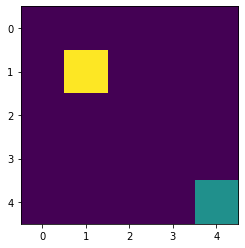

<IPython.core.display.Javascript object>

ACTION ->  1
check here ->  1 1 1
agent pos -> [0 1]
Rewards ->  [0 4]
action ->  1
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

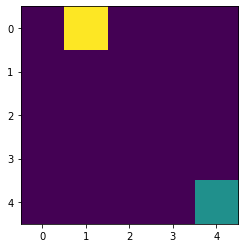

<IPython.core.display.Javascript object>

ACTION ->  1
check here ->  1 0 1
agent pos -> [0 1]
Rewards ->  [0 4]
action ->  1
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

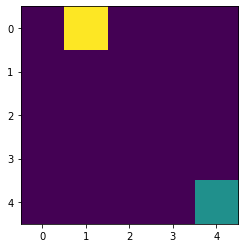

<IPython.core.display.Javascript object>

ACTION ->  0
check here ->  0 0 1
agent pos -> [1 1]
Rewards ->  [0 4]
action ->  0
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

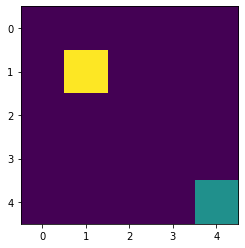

<IPython.core.display.Javascript object>

ACTION ->  2
check here ->  2 1 1
agent pos -> [1 2]
Rewards ->  [0 4]
action ->  2
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  -5
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

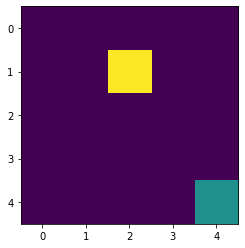

<IPython.core.display.Javascript object>

ACTION ->  2
check here ->  2 1 2
agent pos -> [1 2]
Rewards ->  [0 4]
action ->  2
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  -5
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

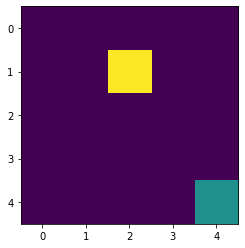

<IPython.core.display.Javascript object>

ACTION ->  0
check here ->  0 1 2
agent pos -> [2 2]
Rewards ->  [0 4]
action ->  0
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

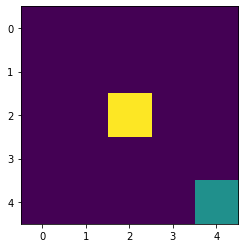

<IPython.core.display.Javascript object>

ACTION ->  1
check here ->  1 2 2
agent pos -> [1 2]
Rewards ->  [0 4]
action ->  1
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  -5
terminated ->  False
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

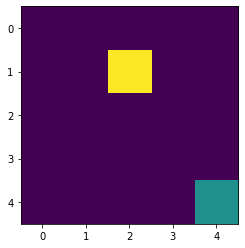

<IPython.core.display.Javascript object>

ACTION ->  0
check here ->  0 1 2
agent pos -> [2 2]
Rewards ->  [0 4]
action ->  0
obs ->  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.5]
reward ->  0
terminated ->  True
truncated ->  True
****************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

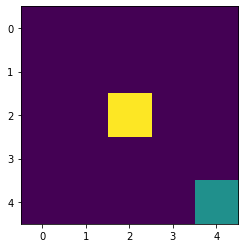

<IPython.core.display.Javascript object>

In [153]:
env = GridEnv()
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  print("ACTION -> ", action)
  observation, reward, terminated, truncated, info = env.step(action, obs)
  print("action -> ", action)
  print("obs -> ", obs)
  print("reward -> ", reward)
  print("terminated -> ", terminated)
  print("truncated -> ", truncated)
  print("****************")
  with output_grid.output_to(0, 0):
    plt.imshow(grid)
    env.render()
  time.sleep(1)